# Machine Learning

In [1]:
import pandas as pd
import numpy as np
import plotly.graph_objects as go
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.ensemble import GradientBoostingClassifier
import os
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from IPython.display import Image


In [2]:
df_train=pd.read_csv("./../data/application_train.csv",encoding="utf-8",index_col=0)
df_test=pd.read_csv("./../data/application_test.csv",encoding="utf-8",index_col=0)

# USE TEST DATASET

In [3]:
df = pd.concat([df_test])
df_safe = pd.concat([df_test])
df_safe

,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
SK_ID_CURR,,,,,,,,,,,,,,,,,,,,,
100001,Cash loans,F,N,Y,0,135000.0,568800.0,20560.5,450000.0,Unaccompanied,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
100005,Cash loans,M,N,Y,0,99000.0,222768.0,17370.0,180000.0,Unaccompanied,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
100013,Cash loans,M,Y,Y,0,202500.0,663264.0,69777.0,630000.0,NaN,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0
100028,Cash loans,F,N,Y,2,315000.0,1575000.0,49018.5,1575000.0,Unaccompanied,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
100038,Cash loans,M,Y,N,1,180000.0,625500.0,32067.0,625500.0,Unaccompanied,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
456221,Cash loans,F,N,Y,0,121500.0,412560.0,17473.5,270000.0,Unaccompanied,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
456222,Cash loans,F,N,N,2,157500.0,622413.0,31909.5,495000.0,Unaccompanied,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
456223,Cash loans,F,Y,Y,1,202500.0,315000.0,33205.5,315000.0,Unaccompanied,...,0,0,0,0,0.0,0.0,0.0,0.0,3.0,1.0


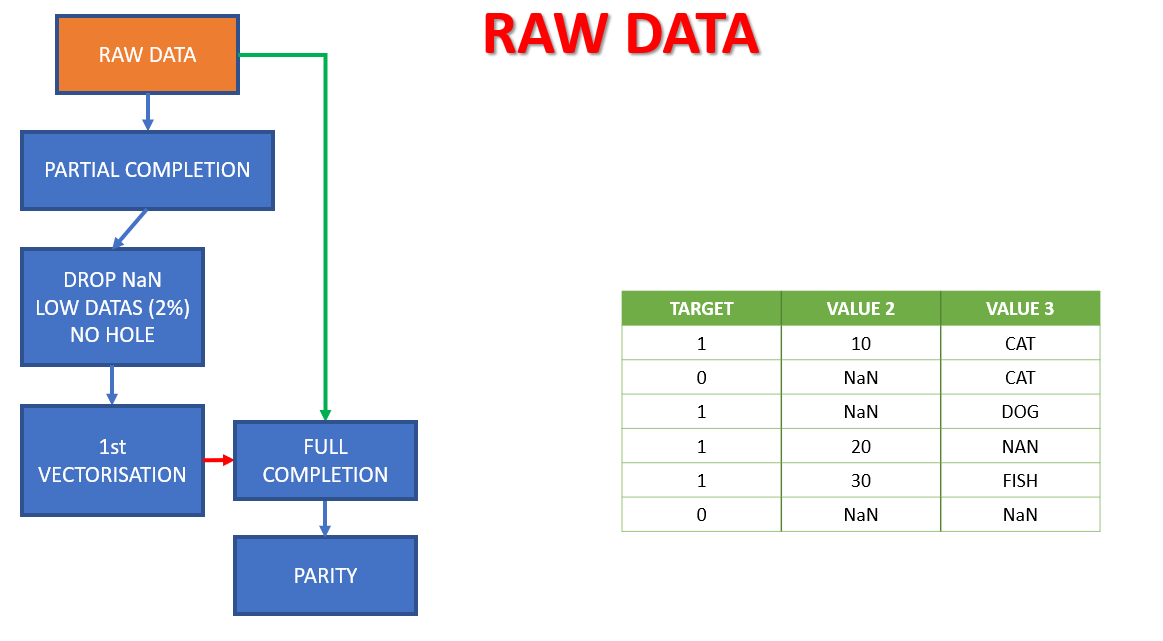

In [8]:
Image("img/raw_data.png")

In [4]:
# comparaison entre df et df sans les nan

df_salvage_drop=df.dropna()
' '.join(['ratio:' , str(df_salvage_drop.shape[0]) ,'/' , str(df.shape[0]), '=' , str(round(df_salvage_drop.shape[0]/df.shape[0]*100,2)), '%'])

'ratio: 1739 / 48744 = 3.57 %'

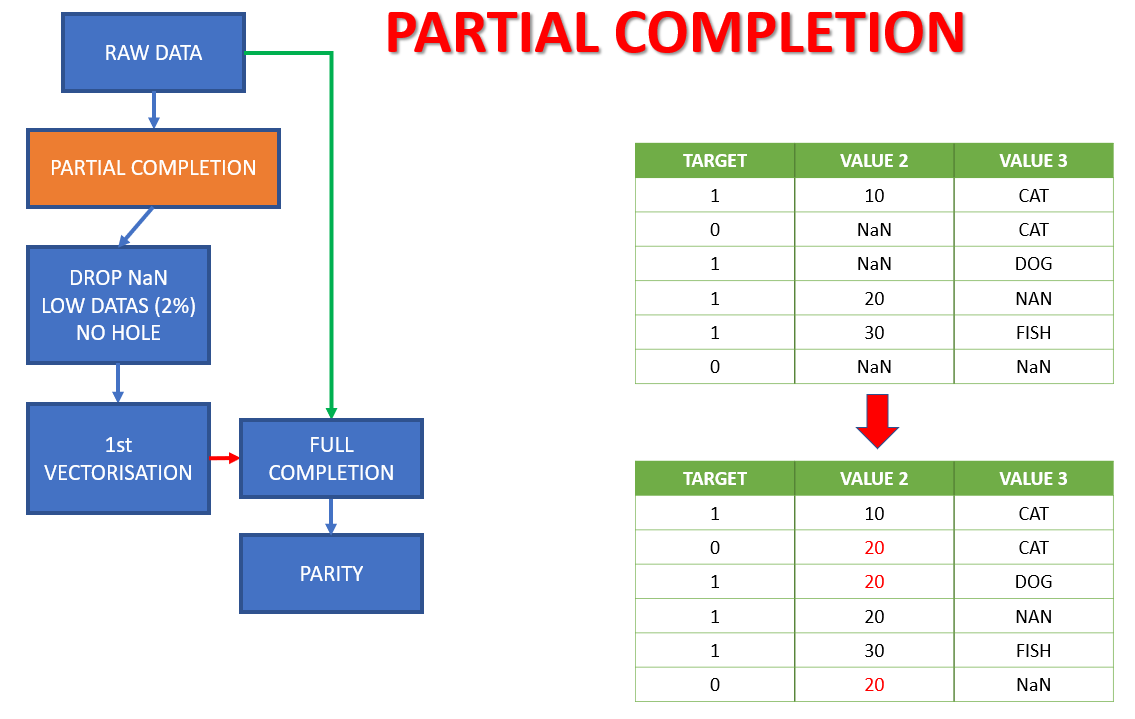

In [7]:
Image("img/partial_completion.png")

In [5]:
# liste les valeurs par default de chaque clmn

def one_line_try(serie):
    try:
        return float(serie.mean())
    except:
        return float(np.nan)
    
default_value_per_clmn = {clmn : one_line_try(df_salvage_drop[clmn]) for clmn in df_salvage_drop}

default_value_per_clmn

{'NAME_CONTRACT_TYPE': nan,
 'CODE_GENDER': nan,
 'FLAG_OWN_CAR': nan,
 'FLAG_OWN_REALTY': nan,
 'CNT_CHILDREN': 0.6129959746981024,
 'AMT_INCOME_TOTAL': 233975.63432432435,
 'AMT_CREDIT': 664432.9700977573,
 'AMT_ANNUITY': 35229.43128234617,
 'AMT_GOODS_PRICE': 603784.4516963772,
 'NAME_TYPE_SUITE': nan,
 'NAME_INCOME_TYPE': nan,
 'NAME_EDUCATION_TYPE': nan,
 'NAME_FAMILY_STATUS': nan,
 'NAME_HOUSING_TYPE': nan,
 'REGION_POPULATION_RELATIVE': 0.02418551466359977,
 'DAYS_BIRTH': -14476.511788384129,
 'DAYS_EMPLOYED': -2530.9056929269696,
 'DAYS_REGISTRATION': -4396.87291546866,
 'DAYS_ID_PUBLISH': -3009.9010925819434,
 'OWN_CAR_AGE': 10.778033352501438,
 'FLAG_MOBIL': 1.0,
 'FLAG_EMP_PHONE': 1.0,
 'FLAG_WORK_PHONE': 0.24726854514088556,
 'FLAG_CONT_MOBILE': 0.9982748706152962,
 'FLAG_PHONE': 0.3139735480161012,
 'FLAG_EMAIL': 0.2593444508338125,
 'OCCUPATION_TYPE': nan,
 'CNT_FAM_MEMBERS': 2.45083381253594,
 'REGION_RATING_CLIENT': 1.9884991374353076,
 'REGION_RATING_CLIENT_W_CITY': 1.

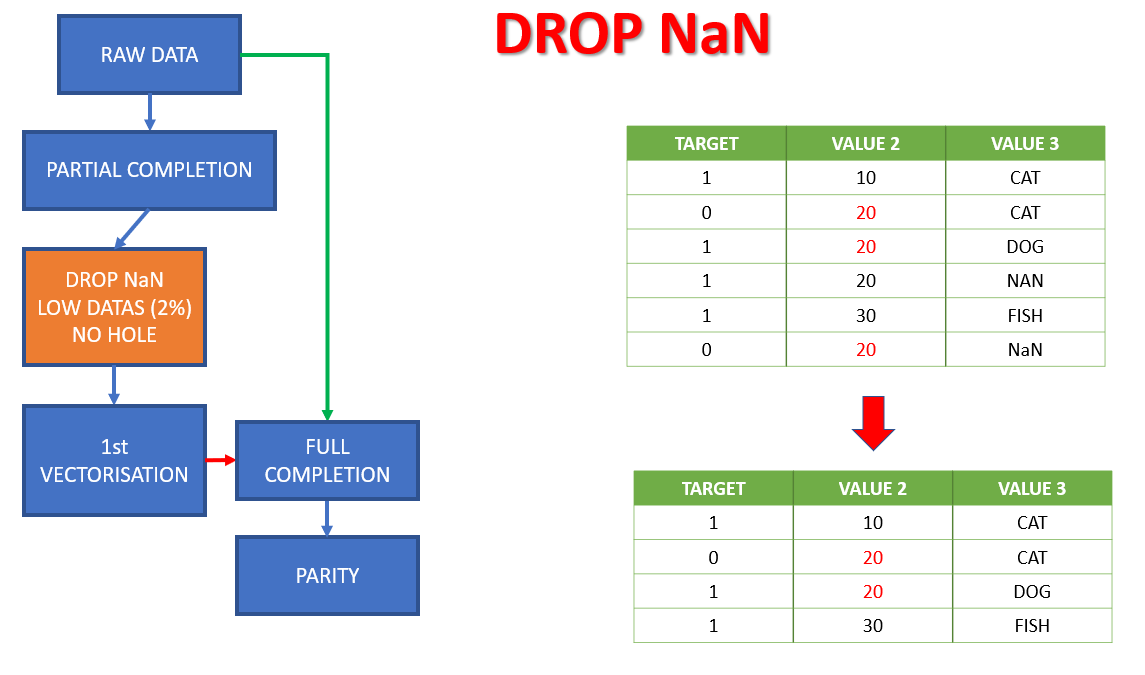

In [9]:
Image("img/drop_nana.png")

In [6]:
# applique ces valeur aux clmn

for clmn in df:
    df[clmn]= [A if str(A) != 'nan' else default_value_per_clmn[clmn] for A in df[clmn]]
df_cute_drop = df.dropna()
' '.join(['ratio:' , str(df_cute_drop.shape[0]) ,'/' , str(df.shape[0]), '=' ,str(round(df_cute_drop.shape[0]/df.shape[0]*100,2)), '%'])



'ratio: 10468 / 48744 = 21.48 %'

In [7]:
del df_cute_drop
del df_salvage_drop
df = df.dropna()

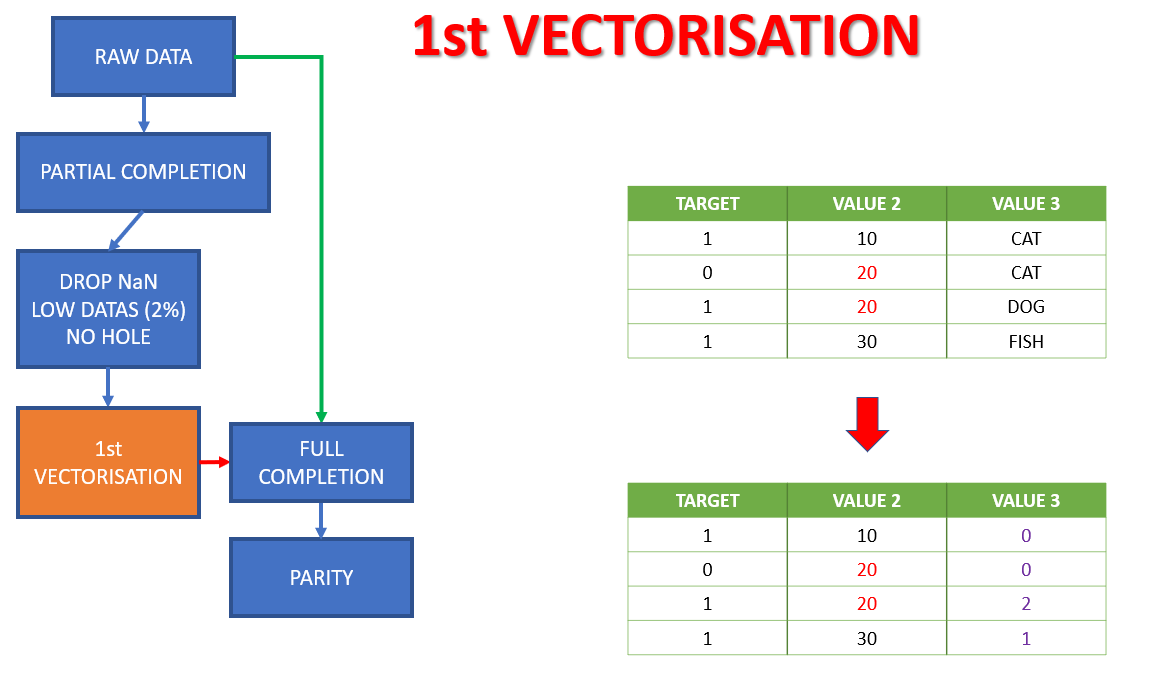

In [10]:
Image("img/frstvec.png")

In [8]:
colonnes=[colonne for colonne in df]
types_colonnes=list(map(lambda x : {x : list(set(df[x].map(lambda x : str(type(x)))))} , colonnes))
colonnes_str=list(filter(lambda x : "<class 'str'>" in x[list(x)[0]], types_colonnes))

def vectorisation(col):
    voc=list(set(list(col)))
    val={voc[i]:i for i in range(len(voc))}
    return col.map(lambda x : val[x])



for i in [list(i)[0] for i in colonnes_str]:
    df[i]=vectorisation(df[i])

In [9]:
# liste les valeurs par default de chaque clmn

def one_line_try(serie):
    try:
        return float(serie.mean())
    except:
        return float(np.nan)
    
default_value_per_clmn = {clmn : one_line_try(df[clmn]) for clmn in df}

df = df_safe


    
for clmn in df:
    df[clmn]= [A if str(A) != 'nan' else default_value_per_clmn[clmn] for A in df[clmn]]
df_cute_drop = df.dropna()
' '.join(['ratio:' , str(df_cute_drop.shape[0]) ,'/' , str(df.shape[0]), '=' ,str(round(df_cute_drop.shape[0]/df.shape[0]*100,2)), '%'])

'ratio: 48744 / 48744 = 100.0 %'

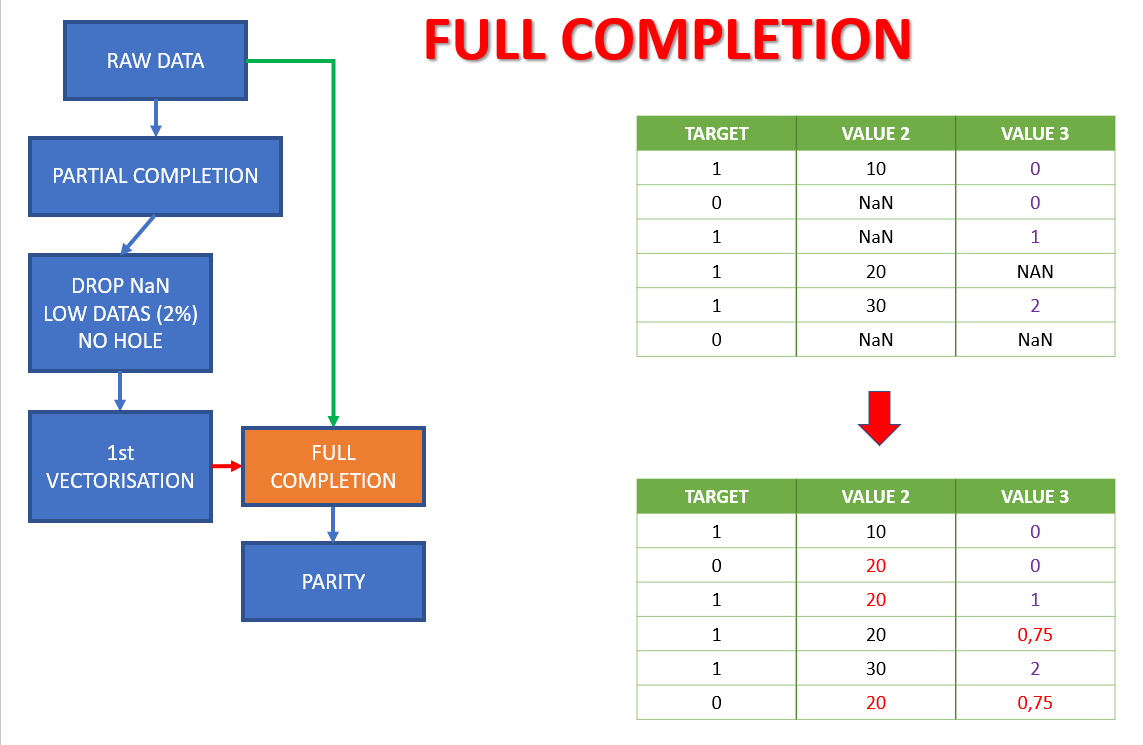

In [11]:
Image("img/rog.png")

In [10]:
default_value_per_clmn

{'NAME_CONTRACT_TYPE': 0.9906381352693925,
 'CODE_GENDER': 0.6324990447076806,
 'FLAG_OWN_CAR': 0.6390905617118838,
 'FLAG_OWN_REALTY': 0.303878486816966,
 'CNT_CHILDREN': 0.465418418035919,
 'AMT_INCOME_TOTAL': 199190.76887562097,
 'AMT_CREDIT': 561177.8322506687,
 'AMT_ANNUITY': 31608.022928828468,
 'AMT_GOODS_PRICE': 502570.0777130302,
 'NAME_TYPE_SUITE': 3.543083683607184,
 'NAME_INCOME_TYPE': 1.51977455101261,
 'NAME_EDUCATION_TYPE': 2.9870080244554833,
 'NAME_FAMILY_STATUS': 2.2804738249904473,
 'NAME_HOUSING_TYPE': 1.1987008024455483,
 'REGION_POPULATION_RELATIVE': 0.02319750114635078,
 'DAYS_BIRTH': -14830.464654184181,
 'DAYS_EMPLOYED': -2579.328525028659,
 'DAYS_REGISTRATION': -4823.712361482613,
 'DAYS_ID_PUBLISH': -2857.711883836454,
 'OWN_CAR_AGE': 10.767581498685006,
 'FLAG_MOBIL': 1.0,
 'FLAG_EMP_PHONE': 1.0,
 'FLAG_WORK_PHONE': 0.24102025219717232,
 'FLAG_CONT_MOBILE': 0.9984715322888804,
 'FLAG_PHONE': 0.30368742835307605,
 'FLAG_EMAIL': 0.19908291937332823,
 'OCCUPATI

In [11]:
df

,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
SK_ID_CURR,,,,,,,,,,,,,,,,,,,,,
100001,Cash loans,F,N,Y,0,135000.0,568800.0,20560.5,450000.0,Unaccompanied,...,0,0,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
100005,Cash loans,M,N,Y,0,99000.0,222768.0,17370.0,180000.0,Unaccompanied,...,0,0,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
100013,Cash loans,M,Y,Y,0,202500.0,663264.0,69777.0,630000.0,3.54308,...,0,0,0,0,0.000000,0.000000,0.000000,0.000000,1.000000,4.000000
100028,Cash loans,F,N,Y,2,315000.0,1575000.0,49018.5,1575000.0,Unaccompanied,...,0,0,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
100038,Cash loans,M,Y,N,1,180000.0,625500.0,32067.0,625500.0,Unaccompanied,...,0,0,0,0,0.001817,0.001371,0.003506,0.009689,0.556172,1.899255
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
456221,Cash loans,F,N,Y,0,121500.0,412560.0,17473.5,270000.0,Unaccompanied,...,0,0,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
456222,Cash loans,F,N,N,2,157500.0,622413.0,31909.5,495000.0,Unaccompanied,...,0,0,0,0,0.001817,0.001371,0.003506,0.009689,0.556172,1.899255
456223,Cash loans,F,Y,Y,1,202500.0,315000.0,33205.5,315000.0,Unaccompanied,...,0,0,0,0,0.000000,0.000000,0.000000,0.000000,3.000000,1.000000


In [12]:
del df_cute_drop
df = df.dropna()

colonnes=[colonne for colonne in df]
types_colonnes=list(map(lambda x : {x : list(set(df[x].map(lambda x : str(type(x)))))} , colonnes))
colonnes_str=list(filter(lambda x : "<class 'str'>" in x[list(x)[0]], types_colonnes))

def vectorisation(col):
    voc=list(set(list(col)))
    val={voc[i]:i for i in range(len(voc))}
    return col.map(lambda x : val[x])

for i in [list(i)[0] for i in colonnes_str]:
    df[i]=vectorisation(df[i])

In [13]:
df

,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
SK_ID_CURR,,,,,,,,,,,,,,,,,,,,,
100001,1,1,1,0,0,135000.0,568800.0,20560.5,450000.0,5,...,0,0,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
100005,1,0,1,0,0,99000.0,222768.0,17370.0,180000.0,5,...,0,0,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
100013,1,0,0,0,0,202500.0,663264.0,69777.0,630000.0,0,...,0,0,0,0,0.000000,0.000000,0.000000,0.000000,1.000000,4.000000
100028,1,1,1,0,2,315000.0,1575000.0,49018.5,1575000.0,5,...,0,0,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
100038,1,0,0,1,1,180000.0,625500.0,32067.0,625500.0,5,...,0,0,0,0,0.001817,0.001371,0.003506,0.009689,0.556172,1.899255
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
456221,1,1,1,0,0,121500.0,412560.0,17473.5,270000.0,5,...,0,0,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
456222,1,1,1,1,2,157500.0,622413.0,31909.5,495000.0,5,...,0,0,0,0,0.001817,0.001371,0.003506,0.009689,0.556172,1.899255
456223,1,1,0,0,1,202500.0,315000.0,33205.5,315000.0,5,...,0,0,0,0,0.000000,0.000000,0.000000,0.000000,3.000000,1.000000


In [14]:
df['OCCUPATION_TYPE'].value_counts()

0     15605
4      8655
10     5072
11     4361
15     3574
12     2773
3      1854
8      1628
17     1316
1       915
18      894
2       656
5       455
6       272
13      213
14      178
9       138
7       104
16       81
Name: OCCUPATION_TYPE, dtype: int64

In [15]:
colonnes=[colonne for colonne in df]
list(map(lambda x : {x : list(set(df[x].map(lambda x : str(type(x)))))} , colonnes))

[{'NAME_CONTRACT_TYPE': ["<class 'int'>"]},
 {'CODE_GENDER': ["<class 'int'>"]},
 {'FLAG_OWN_CAR': ["<class 'int'>"]},
 {'FLAG_OWN_REALTY': ["<class 'int'>"]},
 {'CNT_CHILDREN': ["<class 'int'>"]},
 {'AMT_INCOME_TOTAL': ["<class 'float'>"]},
 {'AMT_CREDIT': ["<class 'float'>"]},
 {'AMT_ANNUITY': ["<class 'float'>"]},
 {'AMT_GOODS_PRICE': ["<class 'float'>"]},
 {'NAME_TYPE_SUITE': ["<class 'int'>"]},
 {'NAME_INCOME_TYPE': ["<class 'int'>"]},
 {'NAME_EDUCATION_TYPE': ["<class 'int'>"]},
 {'NAME_FAMILY_STATUS': ["<class 'int'>"]},
 {'NAME_HOUSING_TYPE': ["<class 'int'>"]},
 {'REGION_POPULATION_RELATIVE': ["<class 'float'>"]},
 {'DAYS_BIRTH': ["<class 'int'>"]},
 {'DAYS_EMPLOYED': ["<class 'int'>"]},
 {'DAYS_REGISTRATION': ["<class 'float'>"]},
 {'DAYS_ID_PUBLISH': ["<class 'int'>"]},
 {'OWN_CAR_AGE': ["<class 'float'>"]},
 {'FLAG_MOBIL': ["<class 'int'>"]},
 {'FLAG_EMP_PHONE': ["<class 'int'>"]},
 {'FLAG_WORK_PHONE': ["<class 'int'>"]},
 {'FLAG_CONT_MOBILE': ["<class 'int'>"]},
 {'FLAG_PH

In [16]:
# harmonise les types
df_test = df.applymap(float)

# USE TRAIN DATASET

In [17]:
df = pd.concat([df_train])
df_safe = pd.concat([df_train])

In [18]:
# comparaison entre df et df sans les nan

df_salvage_drop=df.dropna()
' '.join(['ratio:' , str(df_salvage_drop.shape[0]) ,'/' , str(df.shape[0]), '=' , str(round(df_salvage_drop.shape[0]/df.shape[0]*100,2)), '%'])

'ratio: 8602 / 307511 = 2.8 %'

In [19]:
# liste les valeurs par default de chaque clmn

def one_line_try(serie):
    try:
        return float(serie.mean())
    except:
        return float(np.nan)
    
default_value_per_clmn = {clmn : one_line_try(df_salvage_drop[clmn]) for clmn in df_salvage_drop}

default_value_per_clmn

{'TARGET': 0.06114857009997675,
 'NAME_CONTRACT_TYPE': nan,
 'CODE_GENDER': nan,
 'FLAG_OWN_CAR': nan,
 'FLAG_OWN_REALTY': nan,
 'CNT_CHILDREN': 0.6025342943501512,
 'AMT_INCOME_TOTAL': 222872.41443850266,
 'AMT_CREDIT': 699998.7016391536,
 'AMT_ANNUITY': 31558.948325970705,
 'AMT_GOODS_PRICE': 633833.7415717276,
 'NAME_TYPE_SUITE': nan,
 'NAME_INCOME_TYPE': nan,
 'NAME_EDUCATION_TYPE': nan,
 'NAME_FAMILY_STATUS': nan,
 'NAME_HOUSING_TYPE': nan,
 'REGION_POPULATION_RELATIVE': 0.023542625668449196,
 'DAYS_BIRTH': -14189.009416414787,
 'DAYS_EMPLOYED': -2299.091374099047,
 'DAYS_REGISTRATION': -4276.979190885841,
 'DAYS_ID_PUBLISH': -2975.926296210184,
 'OWN_CAR_AGE': 11.224133922343642,
 'FLAG_MOBIL': 1.0,
 'FLAG_EMP_PHONE': 0.9997674959311788,
 'FLAG_WORK_PHONE': 0.21111369448965356,
 'FLAG_CONT_MOBILE': 0.9968611950709138,
 'FLAG_PHONE': 0.3093466635666124,
 'FLAG_EMAIL': 0.12566844919786097,
 'OCCUPATION_TYPE': nan,
 'CNT_FAM_MEMBERS': 2.401418274819809,
 'REGION_RATING_CLIENT': 2.00

In [20]:
# applique ces valeur aux clmn

for clmn in df:
    df[clmn]= [A if str(A) != 'nan' else default_value_per_clmn[clmn] for A in df[clmn]]
df_cute_drop = df.dropna()
' '.join(['ratio:' , str(df_cute_drop.shape[0]) ,'/' , str(df.shape[0]), '=' ,str(round(df_cute_drop.shape[0]/df.shape[0]*100,2)), '%'])



'ratio: 65789 / 307511 = 21.39 %'

In [21]:
del df_cute_drop
del df_salvage_drop
df = df.dropna()

In [22]:
colonnes=[colonne for colonne in df]
types_colonnes=list(map(lambda x : {x : list(set(df[x].map(lambda x : str(type(x)))))} , colonnes))
colonnes_str=list(filter(lambda x : "<class 'str'>" in x[list(x)[0]], types_colonnes))

def vectorisation(col):
    voc=list(set(list(col)))
    val={voc[i]:i for i in range(len(voc))}
    return col.map(lambda x : val[x])



for i in [list(i)[0] for i in colonnes_str]:
    df[i]=vectorisation(df[i])

In [23]:
# liste les valeurs par default de chaque clmn

def one_line_try(serie):
    try:
        return float(serie.mean())
    except:
        return float(np.nan)
    
default_value_per_clmn = {clmn : one_line_try(df[clmn]) for clmn in df}

df = df_safe


    
for clmn in df:
    df[clmn]= [A if str(A) != 'nan' else default_value_per_clmn[clmn] for A in df[clmn]]
df_cute_drop = df.dropna()
' '.join(['ratio:' , str(df_cute_drop.shape[0]) ,'/' , str(df.shape[0]), '=' ,str(round(df_cute_drop.shape[0]/df.shape[0]*100,2)), '%'])

'ratio: 307511 / 307511 = 100.0 %'

In [24]:
default_value_per_clmn

{'TARGET': 0.07580294578120962,
 'NAME_CONTRACT_TYPE': 0.8885527975801426,
 'CODE_GENDER': 1.6236452902460898,
 'FLAG_OWN_CAR': 0.6301509370867471,
 'FLAG_OWN_REALTY': 0.3066622079678974,
 'CNT_CHILDREN': 0.4726930033896244,
 'AMT_INCOME_TOTAL': 189674.64757330253,
 'AMT_CREDIT': 639970.0816397878,
 'AMT_ANNUITY': 28970.78209647476,
 'AMT_GOODS_PRICE': 574579.8812187448,
 'NAME_TYPE_SUITE': 3.4838802839380443,
 'NAME_INCOME_TYPE': 3.8885071972518204,
 'NAME_EDUCATION_TYPE': 3.0167353204943077,
 'NAME_FAMILY_STATUS': 2.23765371110672,
 'NAME_HOUSING_TYPE': 2.1518794935323533,
 'REGION_POPULATION_RELATIVE': 0.02284704705953883,
 'DAYS_BIRTH': -14919.246408974144,
 'DAYS_EMPLOYED': -2464.831141984222,
 'DAYS_REGISTRATION': -4857.909012144887,
 'DAYS_ID_PUBLISH': -2830.82006110444,
 'OWN_CAR_AGE': 11.279635197656148,
 'FLAG_MOBIL': 1.0,
 'FLAG_EMP_PHONE': 0.9999391995622369,
 'FLAG_WORK_PHONE': 0.21102311936645943,
 'FLAG_CONT_MOBILE': 0.9974615817233884,
 'FLAG_PHONE': 0.301813373056286,


In [25]:
df

,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
SK_ID_CURR,,,,,,,,,,,,,,,,,,,,,
100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,...,0,0,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,...,0,0,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,...,0,0,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,...,0,0,0,0,0.006598,0.007433,0.034693,0.322999,0.260977,1.826957
100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,...,0,0,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
456251,0,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,225000.0,...,0,0,0,0,0.006598,0.007433,0.034693,0.322999,0.260977,1.826957
456252,0,Cash loans,F,N,Y,0,72000.0,269550.0,12001.5,225000.0,...,0,0,0,0,0.006598,0.007433,0.034693,0.322999,0.260977,1.826957
456253,0,Cash loans,F,N,Y,0,153000.0,677664.0,29979.0,585000.0,...,0,0,0,0,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000


In [26]:
del df_cute_drop
df = df.dropna()

colonnes=[colonne for colonne in df]
types_colonnes=list(map(lambda x : {x : list(set(df[x].map(lambda x : str(type(x)))))} , colonnes))
colonnes_str=list(filter(lambda x : "<class 'str'>" in x[list(x)[0]], types_colonnes))

def vectorisation(col):
    voc=list(set(list(col)))
    val={voc[i]:i for i in range(len(voc))}
    return col.map(lambda x : val[x])

for i in [list(i)[0] for i in colonnes_str]:
    df[i]=vectorisation(df[i])

In [27]:
df

,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
SK_ID_CURR,,,,,,,,,,,,,,,,,,,,,
100002,1,1,1,1,0,0,202500.0,406597.5,24700.5,351000.0,...,0,0,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
100003,0,1,2,1,1,0,270000.0,1293502.5,35698.5,1129500.0,...,0,0,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
100004,0,0,1,0,0,0,67500.0,135000.0,6750.0,135000.0,...,0,0,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
100006,0,1,2,1,0,0,135000.0,312682.5,29686.5,297000.0,...,0,0,0,0,0.006598,0.007433,0.034693,0.322999,0.260977,1.826957
100007,0,1,1,1,0,0,121500.0,513000.0,21865.5,513000.0,...,0,0,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
456251,0,1,1,1,1,0,157500.0,254700.0,27558.0,225000.0,...,0,0,0,0,0.006598,0.007433,0.034693,0.322999,0.260977,1.826957
456252,0,1,2,1,0,0,72000.0,269550.0,12001.5,225000.0,...,0,0,0,0,0.006598,0.007433,0.034693,0.322999,0.260977,1.826957
456253,0,1,2,1,0,0,153000.0,677664.0,29979.0,585000.0,...,0,0,0,0,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000


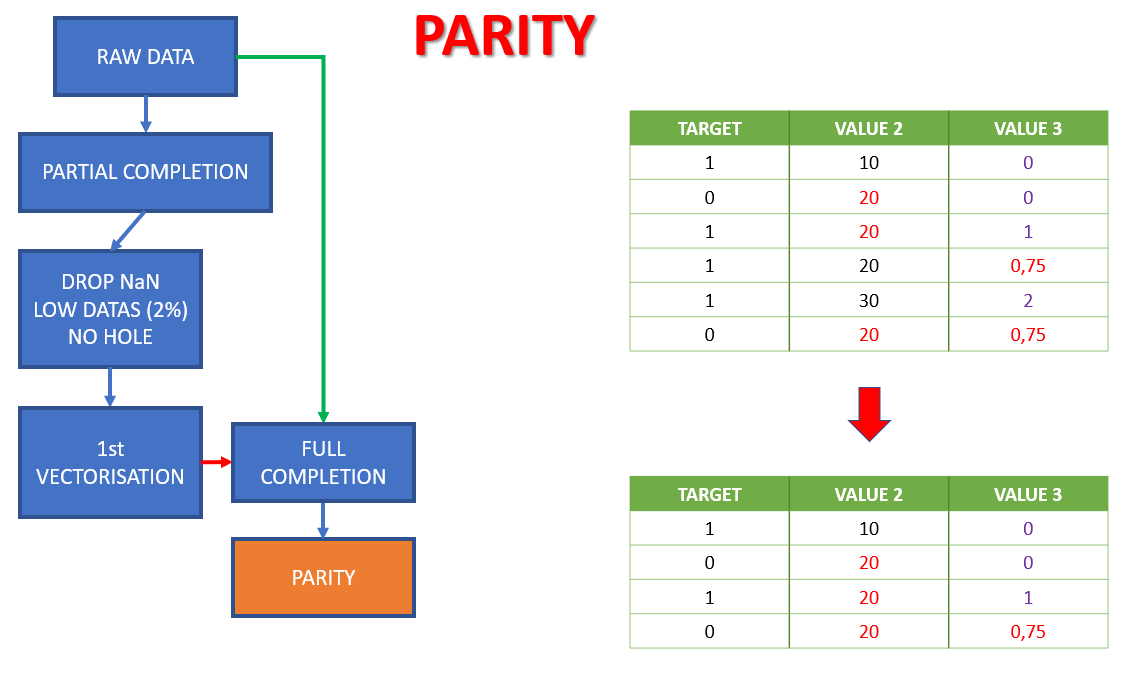

In [12]:
Image("img/par.png")

In [28]:
df_true = df[df['TARGET'] == 1]
df_false = df[df['TARGET'] != 1]
maxi_val = min([df_false.shape[0], df_true.shape[0]])
maxsize = maxi_val*2
print('whith parity: {} / {}'.format(maxsize,df.shape[0],round(maxsize/df.shape[0],2)))
df = pd.concat([df_false.iloc[:maxi_val],df_true.iloc[:maxi_val]])

whith parity: 49650 / 307511


In [29]:
df['OCCUPATION_TYPE'].value_counts()

0     14178
4     10197
10     5649
11     4027
12     3555
15     3027
3      1629
8      1287
17     1280
1      1271
18     1081
2       793
6       531
5       407
14      250
13      206
9       127
7        78
16       77
Name: OCCUPATION_TYPE, dtype: int64

In [30]:
colonnes=[colonne for colonne in df]
list(map(lambda x : {x : list(set(df[x].map(lambda x : str(type(x)))))} , colonnes))

[{'TARGET': ["<class 'int'>"]},
 {'NAME_CONTRACT_TYPE': ["<class 'int'>"]},
 {'CODE_GENDER': ["<class 'int'>"]},
 {'FLAG_OWN_CAR': ["<class 'int'>"]},
 {'FLAG_OWN_REALTY': ["<class 'int'>"]},
 {'CNT_CHILDREN': ["<class 'int'>"]},
 {'AMT_INCOME_TOTAL': ["<class 'float'>"]},
 {'AMT_CREDIT': ["<class 'float'>"]},
 {'AMT_ANNUITY': ["<class 'float'>"]},
 {'AMT_GOODS_PRICE': ["<class 'float'>"]},
 {'NAME_TYPE_SUITE': ["<class 'int'>"]},
 {'NAME_INCOME_TYPE': ["<class 'int'>"]},
 {'NAME_EDUCATION_TYPE': ["<class 'int'>"]},
 {'NAME_FAMILY_STATUS': ["<class 'int'>"]},
 {'NAME_HOUSING_TYPE': ["<class 'int'>"]},
 {'REGION_POPULATION_RELATIVE': ["<class 'float'>"]},
 {'DAYS_BIRTH': ["<class 'int'>"]},
 {'DAYS_EMPLOYED': ["<class 'int'>"]},
 {'DAYS_REGISTRATION': ["<class 'float'>"]},
 {'DAYS_ID_PUBLISH': ["<class 'int'>"]},
 {'OWN_CAR_AGE': ["<class 'float'>"]},
 {'FLAG_MOBIL': ["<class 'int'>"]},
 {'FLAG_EMP_PHONE': ["<class 'int'>"]},
 {'FLAG_WORK_PHONE': ["<class 'int'>"]},
 {'FLAG_CONT_MOBILE'

In [31]:
# matrice de correlation

total_corr = df.corr()
total_corr

,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
TARGET,1.000000,0.062890,-0.098397,0.038372,0.010966,0.036769,-0.003311,-0.061562,-0.025666,-0.079828,...,-0.015011,-0.004168,-0.001697,0.001761,-0.000794,0.003584,0.004744,-0.022171,-0.001456,0.036567
NAME_CONTRACT_TYPE,0.062890,1.000000,-0.029956,-0.001911,0.067331,-0.014276,0.005899,0.223844,0.258240,0.186207,...,-0.006782,0.001136,0.007093,-0.073451,-0.000864,0.002944,0.012724,0.013701,0.020276,0.046508
CODE_GENDER,-0.098397,-0.029956,1.000000,0.324512,-0.032887,-0.020993,-0.026673,-0.003185,-0.076962,-0.000739,...,-0.012477,0.000104,0.001187,-0.029151,-0.004898,-0.001923,0.000757,-0.009032,0.014178,0.014820
FLAG_OWN_CAR,0.038372,-0.001911,0.324512,1.000000,0.013717,-0.089375,-0.031451,-0.103055,-0.136290,-0.106773,...,0.003520,0.007790,-0.003542,-0.004892,-0.005989,-0.001666,-0.003541,-0.019142,0.011640,0.021796
FLAG_OWN_REALTY,0.010966,0.067331,-0.032887,0.013717,1.000000,-0.003666,-0.006324,0.024140,-0.004467,0.031434,...,0.075569,0.010782,0.018875,0.009356,0.003178,0.004066,-0.008033,-0.000617,-0.015123,-0.058622
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
AMT_REQ_CREDIT_BUREAU_DAY,0.003584,0.002944,-0.001923,-0.001666,0.004066,-0.008936,0.001198,0.010445,0.007233,0.010796,...,0.003966,0.006746,-0.001797,-0.001470,0.206626,1.000000,0.236766,-0.011059,-0.004360,0.001567
AMT_REQ_CREDIT_BUREAU_WEEK,0.004744,0.012724,0.000757,-0.003541,-0.008033,-0.005406,0.001141,0.010079,0.027307,0.010571,...,-0.004660,-0.003828,0.004817,0.001215,0.011761,0.236766,1.000000,-0.017111,-0.015773,0.016946
AMT_REQ_CREDIT_BUREAU_MON,-0.022171,0.013701,-0.009032,-0.019142,-0.000617,-0.014545,0.009963,0.049359,0.037418,0.051631,...,0.006660,-0.002432,-0.002507,-0.005039,-0.002078,-0.011059,-0.017111,1.000000,-0.006886,-0.006683
AMT_REQ_CREDIT_BUREAU_QRT,-0.001456,0.020276,0.014178,0.011640,-0.015123,-0.017412,-0.000305,0.002636,-0.000259,0.003903,...,-0.002583,-0.000757,-0.000451,0.000396,0.003545,-0.004360,-0.015773,-0.006886,1.000000,0.100875


In [32]:
# liste les meuilleurs correlations entre les clmns

def get_coor(mat, corr = .75):
    clmn_lst = mat.columns
    exeption = [] 
    val = 0
    for clmn in mat:
        cmd = lambda idx, val: [print("{} -> {} : ".format(clmn, clmn_lst[idx]).ljust(80, ' ') + str(val)),  exeption.append(val)]
        [cmd(idx, val) for idx, val in enumerate(mat[clmn]) if val > corr and val != 1 and val not in exeption]

        

get_coor(total_corr, .99)

APARTMENTS_AVG -> APARTMENTS_MEDI :                                             0.9953128281549072
BASEMENTAREA_AVG -> BASEMENTAREA_MEDI :                                         0.9951627302008851
YEARS_BEGINEXPLUATATION_AVG -> YEARS_BEGINEXPLUATATION_MEDI :                   0.9947460176621639
YEARS_BUILD_AVG -> YEARS_BUILD_MEDI :                                           0.9982955625414173
COMMONAREA_AVG -> COMMONAREA_MEDI :                                             0.9941763406950069
ELEVATORS_AVG -> ELEVATORS_MEDI :                                               0.9957400738014422
ENTRANCES_AVG -> ENTRANCES_MEDI :                                               0.9967026252646868
FLOORSMAX_AVG -> FLOORSMAX_MEDI :                                               0.997188726862192
FLOORSMIN_AVG -> FLOORSMIN_MEDI :                                               0.9972034449404995
LIVINGAPARTMENTS_AVG -> LIVINGAPARTMENTS_MEDI :                                 0.9978363346144896
LIVINGAREA_

In [33]:
# liste les meuilleurs corelations par rapport a une clmn

def get_clmn_corr(mat, clmn, corr = 0.1):
    serie = mat[clmn]
    clmn_lst = list(serie.keys())
    cmd = lambda idx, val: print("{} -> {} : ".format(clmn, clmn_lst[idx]).ljust(80, ' ') + str(val))
    [cmd(idx, val) for idx, val in enumerate(mat[clmn]) if abs(val) > corr and val != 1]
    
get_clmn_corr(total_corr, 'TARGET', 0.05)

TARGET -> NAME_CONTRACT_TYPE :                                                  0.06288993877849013
TARGET -> CODE_GENDER :                                                         -0.09839681222336581
TARGET -> AMT_CREDIT :                                                          -0.06156207185055225
TARGET -> AMT_GOODS_PRICE :                                                     -0.07982760004621715
TARGET -> NAME_INCOME_TYPE :                                                    0.10557380640792126
TARGET -> NAME_EDUCATION_TYPE :                                                 0.09994050595933784
TARGET -> NAME_FAMILY_STATUS :                                                  -0.0748843224755417
TARGET -> REGION_POPULATION_RELATIVE :                                          -0.07003072679905835
TARGET -> DAYS_BIRTH :                                                          0.14522242308079547
TARGET -> DAYS_EMPLOYED :                                                       -0.0870200774025

In [34]:
df = df.applymap(float)
df['TARGET'] = df['TARGET'].apply(int)
df_train = df

In [35]:
df_train

,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
SK_ID_CURR,,,,,,,,,,,,,,,,,,,,,
100003,0,1.0,2.0,1.0,1.0,0.0,270000.0,1293502.5,35698.5,1129500.0,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
100004,0,0.0,1.0,0.0,0.0,0.0,67500.0,135000.0,6750.0,135000.0,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
100006,0,1.0,2.0,1.0,0.0,0.0,135000.0,312682.5,29686.5,297000.0,...,0.0,0.0,0.0,0.0,0.006598,0.007433,0.034693,0.322999,0.260977,1.826957
100007,0,1.0,1.0,1.0,0.0,0.0,121500.0,513000.0,21865.5,513000.0,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
100008,0,1.0,1.0,1.0,0.0,0.0,99000.0,490495.5,27517.5,454500.0,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
456186,1,1.0,1.0,1.0,1.0,1.0,207000.0,450000.0,32746.5,450000.0,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
456215,1,1.0,2.0,1.0,1.0,1.0,144000.0,1303200.0,46809.0,1125000.0,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,1.000000,0.000000,6.000000
456225,1,1.0,1.0,1.0,0.0,0.0,225000.0,297000.0,19975.5,297000.0,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000


In [36]:
df_test

,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
SK_ID_CURR,,,,,,,,,,,,,,,,,,,,,
100001,1.0,1.0,1.0,0.0,0.0,135000.0,568800.0,20560.5,450000.0,5.0,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
100005,1.0,0.0,1.0,0.0,0.0,99000.0,222768.0,17370.0,180000.0,5.0,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
100013,1.0,0.0,0.0,0.0,0.0,202500.0,663264.0,69777.0,630000.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,1.000000,4.000000
100028,1.0,1.0,1.0,0.0,2.0,315000.0,1575000.0,49018.5,1575000.0,5.0,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
100038,1.0,0.0,0.0,1.0,1.0,180000.0,625500.0,32067.0,625500.0,5.0,...,0.0,0.0,0.0,0.0,0.001817,0.001371,0.003506,0.009689,0.556172,1.899255
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
456221,1.0,1.0,1.0,0.0,0.0,121500.0,412560.0,17473.5,270000.0,5.0,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
456222,1.0,1.0,1.0,1.0,2.0,157500.0,622413.0,31909.5,495000.0,5.0,...,0.0,0.0,0.0,0.0,0.001817,0.001371,0.003506,0.009689,0.556172,1.899255
456223,1.0,1.0,0.0,0.0,1.0,202500.0,315000.0,33205.5,315000.0,5.0,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,3.000000,1.000000


#  Machine Learning

In [37]:
from machinelearning import prediction


file=open("machinelearning.py","r",encoding="utf-8")
#print(file.read())
file.close()
del file

c:\users\minim\anaconda3\envs\python37\lib\site-packages\eli5\base_utils.py:28: DeprecationWarning: inspect.getargspec() is deprecated since Python 3.0, use inspect.signature() or inspect.getfullargspec()
  init_args = inspect.getargspec(class_.__init__)
c:\users\minim\anaconda3\envs\python37\lib\site-packages\eli5\base_utils.py:36: DeprecationWarning: The usage of `cmp` is deprecated and will be removed on or after 2021-06-01.  Please use `eq` and `order` instead.
  return attr.s(class_, these=these, init=False, slots=True, **attrs_kwargs)  # type: ignore
c:\users\minim\anaconda3\envs\python37\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.metrics.scorer module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)
c:\users\minim\a

In [38]:
# harmonise les types


`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.


In [39]:
prediction(df_train,models=[{"modèle":LinearSVC,"paramètres":{"random_state":44}},
                       {"modèle":RandomForestClassifier,"paramètres":{"n_estimators":750,"random_state":44}},
                       {"modèle":GradientBoostingClassifier,"paramètres":{"random_state":44}},
                       {"modèle":LogisticRegression,"paramètres":{"random_state":44}},
                      {"modèle":XGBClassifier,"paramètres":{}}
                     ],
          dataframe_non_qualifié=df_test)

création des échantillons
Qualification des données...
Apprentissage des modèles


Liblinear failed to converge, increase the number of iterations.


Model type not yet supported by TreeExplainer: <class 'sklearn.svm._classes.LinearSVC'>
La précision du modèle LinearSVC(random_state=44) est : 66.36%
Qualification des données...


'RandomForestClassifier' object has no attribute 'transform'
La précision du modèle RandomForestClassifier(n_estimators=750, random_state=44) est : 90.96%
Qualification des données...


'GradientBoostingClassifier' object has no attribute 'transform'
La précision du modèle GradientBoostingClassifier(random_state=44) est : 83.06%
Qualification des données...


Model type not yet supported by TreeExplainer: <class 'sklearn.linear_model._logistic.LogisticRegression'>
La précision du modèle LogisticRegression(random_state=44) est : 61.61%
Qualification des données...


NPY_ARRAY_UPDATEIFCOPY, NPY_ARRAY_INOUT_ARRAY, and NPY_ARRAY_INOUT_FARRAY are deprecated, use NPY_WRITEBACKIFCOPY, NPY_ARRAY_INOUT_ARRAY2, or NPY_ARRAY_INOUT_FARRAY2 respectively instead, and call PyArray_ResolveWritebackIfCopy before the array is deallocated, i.e. before the last call to Py_DECREF.
UPDATEIFCOPY detected in array_dealloc.  Required call to PyArray_ResolveWritebackIfCopy or PyArray_DiscardWritebackIfCopy is missing


'XGBClassifier' object has no attribute 'transform'
La précision du modèle XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None) est : 91.72%
Qualification des données...


#  Let's check models details

In [40]:
fichiers=os.listdir("./../")
fichiers=list(filter(lambda x : x[-5:]=='.html',fichiers))

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.


In [41]:
from IPython.core.display import display, HTML
for fichier in fichiers:
    print(fichier[:-5],':')
    f=open("./../"+fichier,'r')
    g=f.read()
    f.close()
    
    display(HTML(g))
    f=open("./../"+fichier[:-4]+'txt','r')
    g=f.read()
    f.close()
    print(g,'\n\n')

GradientBoostingClassifier :


Weight,Feature
0.0652 ± 0.2781,x48
0.0634 ± 0.2091,x70
0.0506 ± 0.1546,x42
0.0424 ± 0.1535,x32
0.0353 ± 0.1529,x96
0.0346 ± 0.1733,x93
0.0290 ± 0.1570,x43
0.0273 ± 0.2593,x97
0.0258 ± 0.1842,x55
0.0204 ± 0.2503,x76


              precision    recall  f1-score   support

           0       0.88      0.76      0.82      4971
           1       0.79      0.90      0.84      4959

    accuracy                           0.83      9930
   macro avg       0.84      0.83      0.83      9930
weighted avg       0.84      0.83      0.83      9930
 


LinearSVC :


              precision    recall  f1-score   support

           0       0.83      0.41      0.55      4971
           1       0.61      0.91      0.73      4959

    accuracy                           0.66      9930
   macro avg       0.72      0.66      0.64      9930
weighted avg       0.72      0.66      0.64      9930
 


LogisticRegression :


              precision    recall  f1-score   support

           0       0.57      0.93      0.71      4971
           1       0.81      0.30      0.44      4959

    accuracy                           0.62      9930
   macro avg       0.69      0.62      0.57      9930
weighted avg       0.69      0.62      0.57      9930
 


RandomForestClassifier :


Weight,Feature
0.0201 ± 0.0815,x48
0.0178 ± 0.0778,x70
0.0141 ± 0.0642,x93
0.0136 ± 0.0586,x97
0.0135 ± 0.0608,x96
0.0131 ± 0.0584,x75
0.0130 ± 0.0564,x86
0.0129 ± 0.0556,x32
0.0128 ± 0.0528,x42
0.0125 ± 0.0497,x72


              precision    recall  f1-score   support

           0       0.90      0.92      0.91      4971
           1       0.92      0.90      0.91      4959

    accuracy                           0.91      9930
   macro avg       0.91      0.91      0.91      9930
weighted avg       0.91      0.91      0.91      9930
 


XGBClassifier :


Weight,Feature
0.0692,f42
0.0636,f48
0.0358,f97
0.0328,f76
0.0311,f93
0.0284,f11
0.0258,f32
0.0250,f109
0.0198,f105
0.0186,f24


              precision    recall  f1-score   support

           0       0.93      0.91      0.92      4971
           1       0.91      0.93      0.92      4959

    accuracy                           0.92      9930
   macro avg       0.92      0.92      0.92      9930
weighted avg       0.92      0.92      0.92      9930
 




In [42]:
import os
import webbrowser
path=os.getcwd()
os.chdir("./../")
webbrowser.open('http://127.0.0.1:5000/', new=2)
os.popen('start cmd.exe /c mlflow ui')
os.chdir(str(path))

In [ ]:
# Loading a model

In [43]:
import pickle
pkl_file = open('./mlruns/0/fb9ce46b977e4a4081c5960d79d63cf7/artifacts/model/model.pkl', 'rb')

data1 = pickle.load(pkl_file)
data1.get_params()
pkl_file.close()

In [44]:
command='mlflow models serve -m ./mlruns/0/fb9ce46b977e4a4081c5960d79d63cf7/artifacts/model -p 1234'


In [1]:
import os

os.system('jupyter nbconvert --to html "Machine Learning.ipynb"')

0

# Documenting the project

In [14]:
import webbrowser
f=open("build/index.html","r",encoding="utf-8")
g=f.read()
f.close()
g=g.split('\n')
g=[i for i in g if 'iframe' not in i]
ind=g.index('</ul>')
g[ind]="""<iframe style="width:100vh;height:100vh;" src="./../Machine Learning.html"></iframe>\n</ul>"""
f=open("build/index.html","w",encoding="utf-8")
f.write('\n'.join(g))
f.close()


False